In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

In [53]:
drivers_df = pd.read_csv('data/drivers.csv')
constructors_df = pd.read_csv('data/constructors.csv', usecols=['constructorId', 'constructorRef'])
races_df = pd.read_csv('data/races.csv')
results_df = pd.read_csv('data/results.csv')
status_df = pd.read_csv('data/status.csv')

In [54]:
# Merge in other datasets
results_df = results_df.merge(races_df[['raceId', 'date']], on='raceId')
results_df = results_df.merge(status_df, on='statusId')
results_df = results_df.merge(constructors_df, on='constructorId')

# Sort by date
results_df['date'] = pd.to_datetime(results_df['date'])
results_df = results_df.sort_values(by='date')

drop_cols = ['resultId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'constructorId']

df = results_df[results_df.date.dt.year > 2011].drop(columns=drop_cols)

<AxesSubplot: xlabel='constructorRef', ylabel='statusId'>

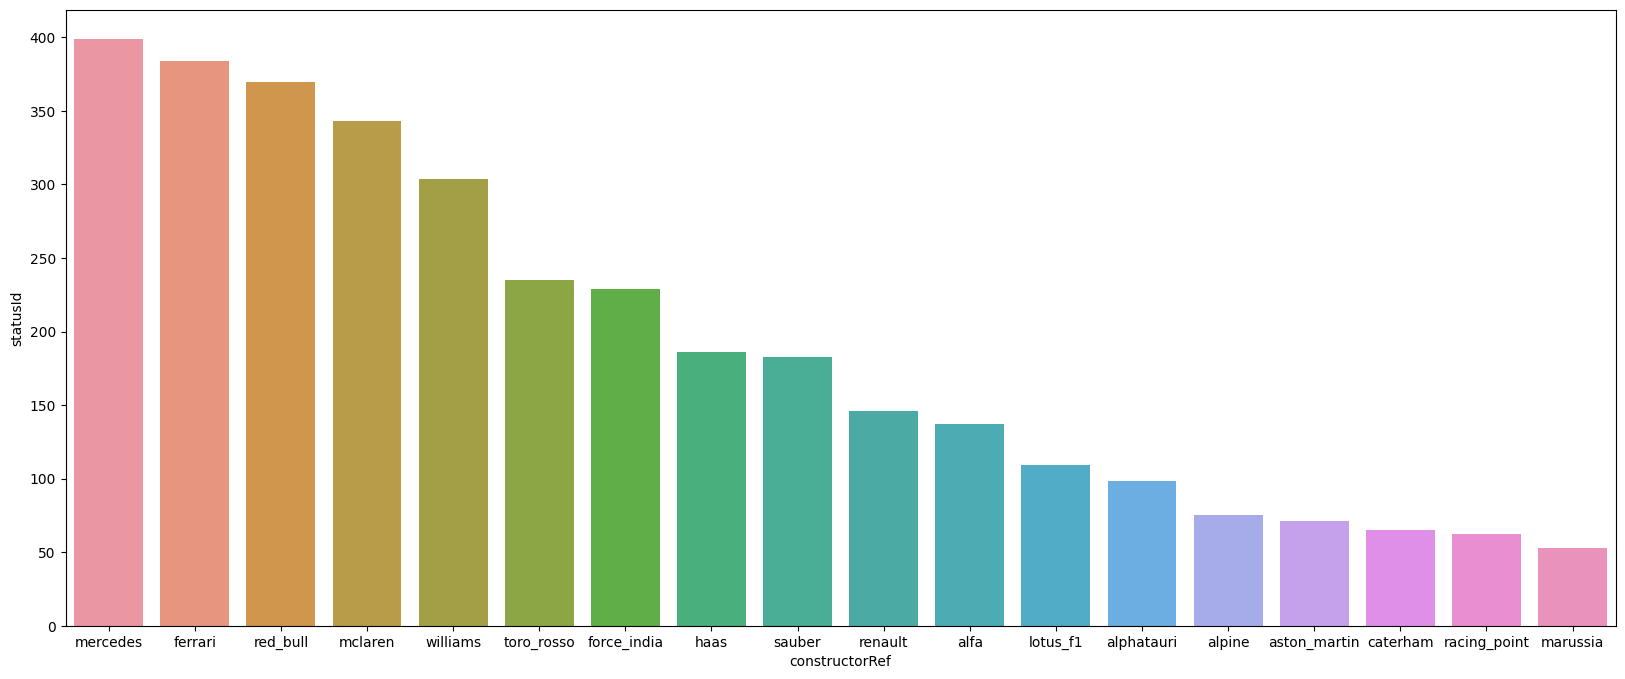

In [69]:
counts = df[(df.status == 'Finished') | (df.status == '+1 Lap')].groupby('constructorRef').count().drop(columns=['raceId', 'driverId', 'date', 'status']).reset_index()
counts = counts.sort_values(by='statusId', ascending=False)
plt.figure(figsize=(20, 8))
plt.tight_layout()
sns.barplot(data=counts.head(18), x='constructorRef', y='statusId')

In [40]:
# status_counts = df[df.constructorId == 1].groupby('status').count().drop(columns=['driverId', 'constructorId', 'date', 'raceId']).reset_index()
# status_counts.sort_values(by='statusId', inplace=True, ascending=False)
# plt.figure(figsize=(12, 4))
# sns.barplot(data=status_counts.tail(-2).head(5), x='status', y='statusId')